In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [9]:
# step 1: Load he data
df=pd.read_csv("EV_CARS _INDIA.csv")

In [10]:
df

,Brand Name,Battery Capacity(kWh),Acceleration(sec),TopSpeed(km/h),Range(km),Max Power(kW),Max Torque(Nm),Transmission,No. of Seats,Charging T(h),No. of Airbags,Drive Type,Price(Lh)
0,Audi RS e-tron GT,93.40,3.3,250,480,500,830,Automatic,5,9,Yes,AWD,204
1,Audi e-tron GT,93.40,4.1,245,500,523,630,Automatic,5,9,Yes,AWD,179
2,Audi e-tron,95.00,5.7,200,484,300,664,Automatic,5,9,Yes,AWD,123
3,Tata Nexon EV,30.20,9.9,180,312,96,245,Automatic,5,9,Yes,FWD,17
4,Tata Tigor EV,26.00,5.7,120,306,55,170,Automatic,5,9,Yes,FWD,14
5,Hyudai Kona Electric,39.20,9.7,155,452,103,395,Automatic,5,7,Yes,FWD,24
6,Jaguar I-Pace,90.00,4.8,200,470,294,696,Automatic,5,13,Yes,AWD,112
7,Mahindra eVerito,21.20,11.2,86,140,33,91,Automatic,5,12,Yes,FWD,10
8,MG ZS EV,44.50,8.5,120,340,107,353,Automatic,5,8,Yes,FWD,25
9,Mercedes Benz EQC,80.00,5.1,180,414,304,760,Automatic,5,21,Yes,AWD,100


In [13]:
#step 2 : data preprocessing
print("Inial Data Overview:")
print(df.head())
print(df.info())

Inial Data Overview:
           Brand Name  Battery Capacity(kWh)  Acceleration(sec)  \
0  Audi RS e-tron GT                    93.4                3.3   
1     Audi e-tron GT                    93.4                4.1   
2        Audi e-tron                    95.0                5.7   
3       Tata Nexon EV                   30.2                9.9   
4       Tata Tigor EV                   26.0                5.7   

   TopSpeed(km/h)  Range(km)  Max Power(kW)  Max Torque(Nm) Transmission  \
0             250        480            500             830    Automatic   
1             245        500            523             630    Automatic   
2             200        484            300             664    Automatic   
3             180        312             96             245    Automatic   
4             120        306             55             170    Automatic   

   No. of Seats  Charging T(h) No. of Airbags Drive Type  Price(Lh)  
0             5              9            Yes    

In [14]:
print(df.columns)

Index(['Brand Name', 'Battery Capacity(kWh)', 'Acceleration(sec)',
       'TopSpeed(km/h)', 'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)',
       'Transmission', 'No. of Seats', 'Charging T(h)', 'No. of Airbags',
       'Drive Type', 'Price(Lh)'],
      dtype='object')


In [15]:
#Handle missing values (if any)
df.dropna(inplace=True)

In [16]:
numerical_columns =df.select_dtypes(include=['number']).columns
data=df[numerical_columns]

In [19]:
print("Selected Numerical Columns:",numerical_columns)
print("Data Shape:", data.shape)
print("Data Preview:\n", data.head())
print(df.dtypes)

Selected Numerical Columns: Index(['Battery Capacity(kWh)', 'Acceleration(sec)', 'TopSpeed(km/h)',
       'Range(km)', 'Max Power(kW)', 'Max Torque(Nm)', 'No. of Seats',
       'Charging T(h)', 'Price(Lh)'],
      dtype='object')
Data Shape: (11, 9)
Data Preview:
    Battery Capacity(kWh)  Acceleration(sec)  TopSpeed(km/h)  Range(km)  \
0                   93.4                3.3             250        480   
1                   93.4                4.1             245        500   
2                   95.0                5.7             200        484   
3                   30.2                9.9             180        312   
4                   26.0                5.7             120        306   

   Max Power(kW)  Max Torque(Nm)  No. of Seats  Charging T(h)  Price(Lh)  
0            500             830             5              9        204  
1            523             630             5              9        179  
2            300             664             5              9    

scaler= StandardScaler()
data_scaled=scaler.fit_transform(data)

In [22]:
kmeans=KMeans(n_clusters=3, random_state=42)
df['Cluster'] =kmeans.fit_predict(data_scaled)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


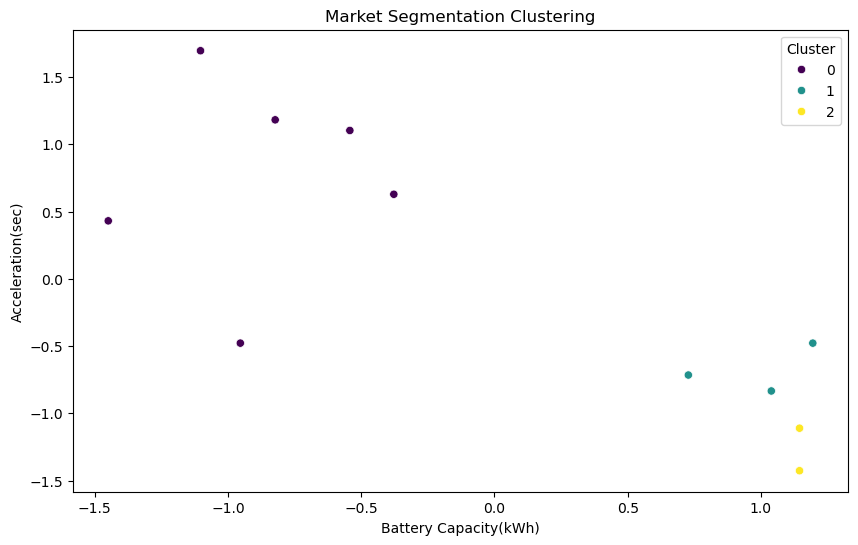

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Market Segmentation Clustering')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8012\1520315832.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=data_scaled[:, 0], palette='coolwarm')


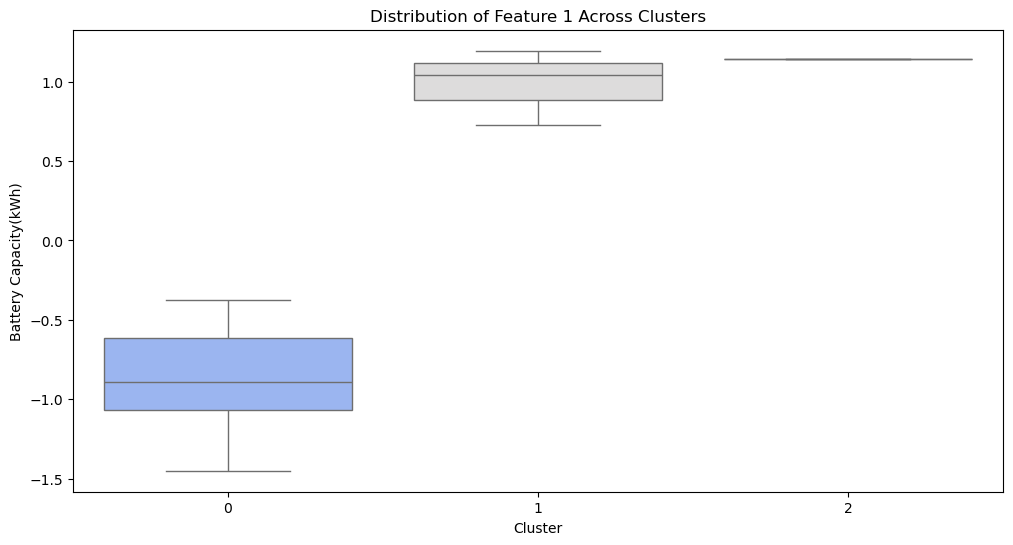

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Cluster'], y=data_scaled[:, 0], palette='coolwarm')
plt.title('Distribution of Feature 1 Across Clusters')
plt.xlabel('Cluster')
plt.ylabel(numerical_columns[0])
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_8012\3690699798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Cluster'], y=data_scaled[:, 1], palette='coolwarm')


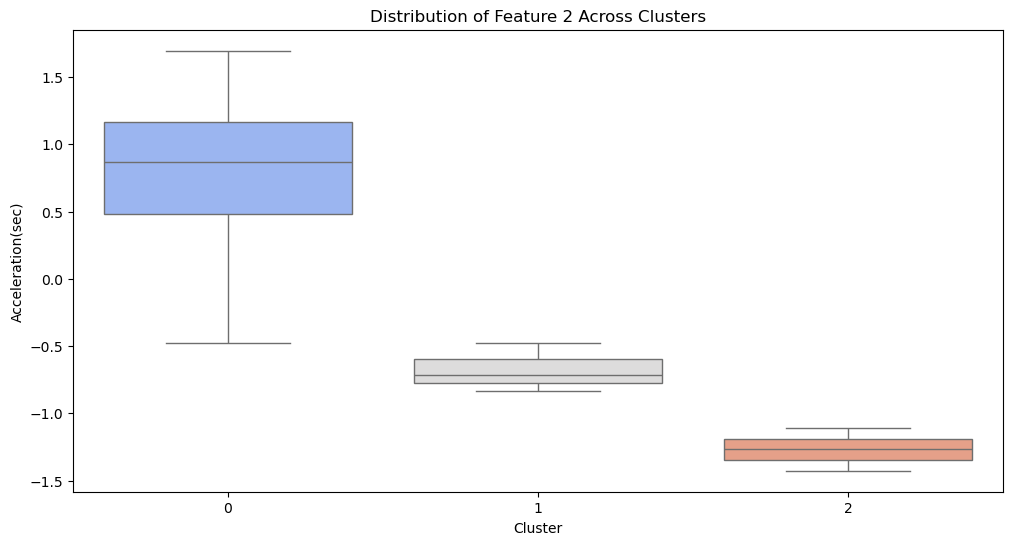

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Cluster'], y=data_scaled[:, 1], palette='coolwarm')
plt.title('Distribution of Feature 2 Across Clusters')
plt.xlabel('Cluster')
plt.ylabel(numerical_columns[1])
plt.show()

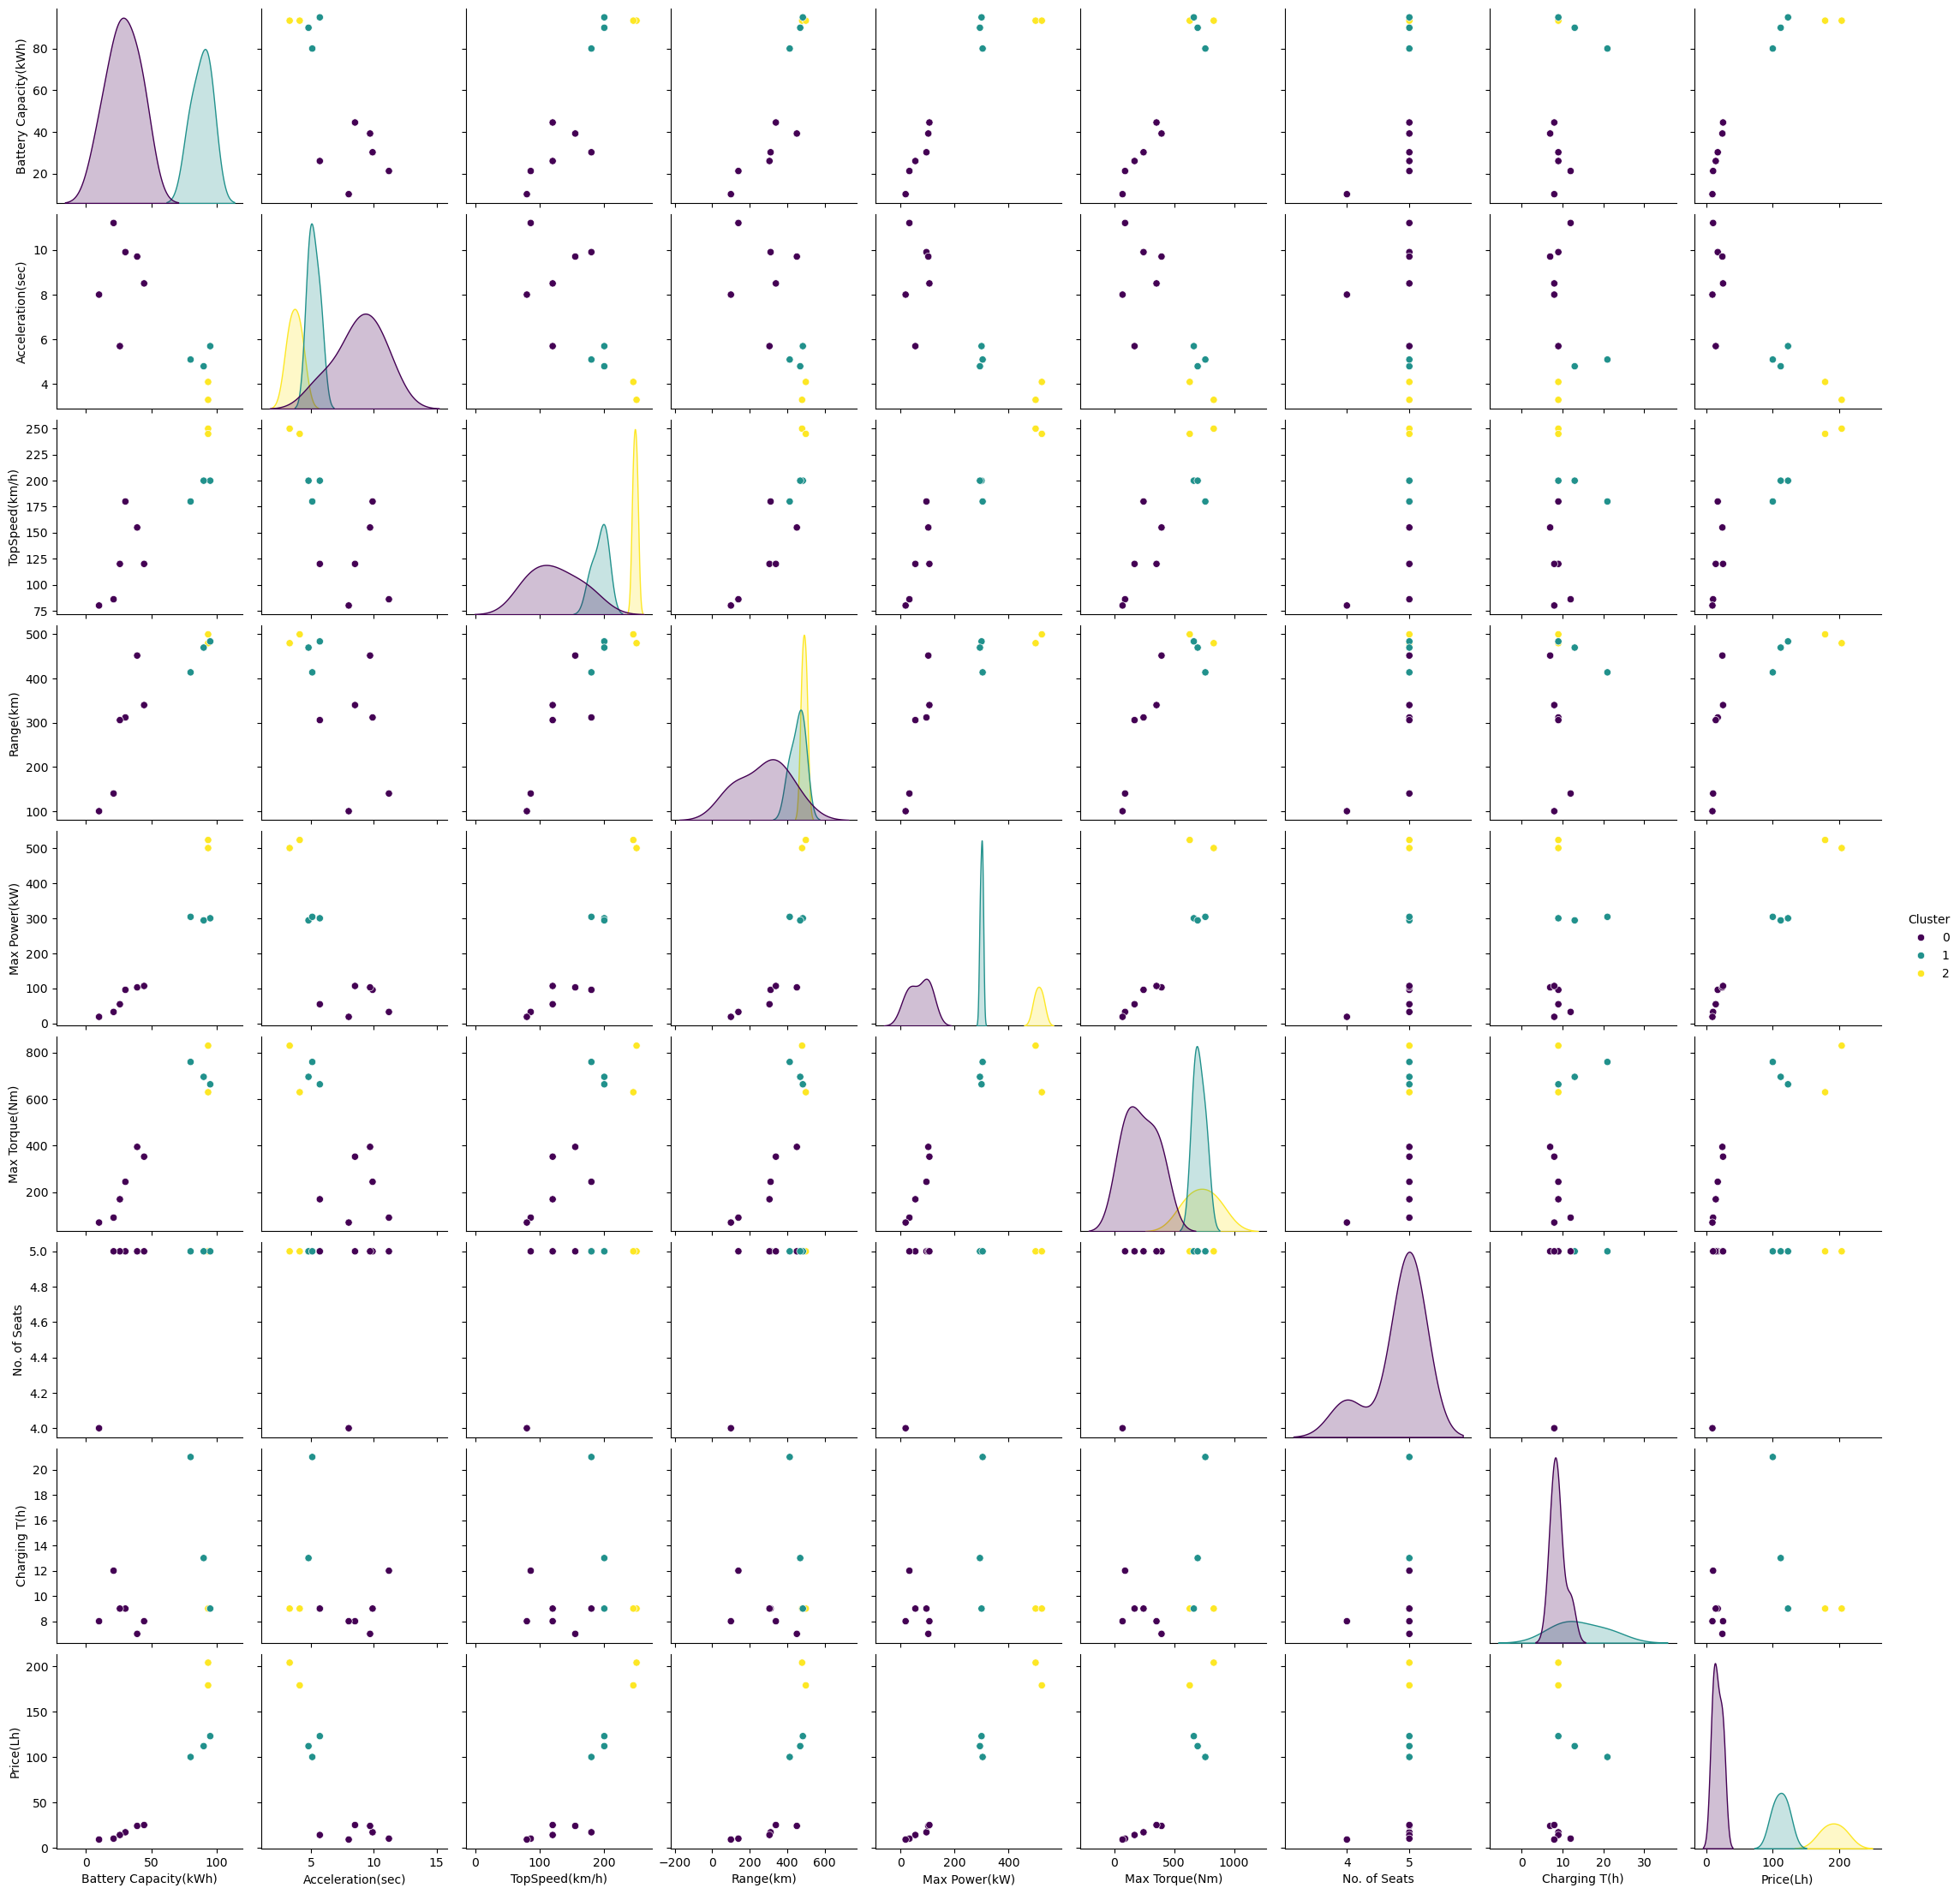

In [26]:
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()

In [27]:
print("Market Segmentation Completed!")

Market Segmentation Completed!


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [29]:
df1 = pd.read_csv("EV_list.xlsx - Sheet1.csv")
print("Data Loaded Successfully!")

Data Loaded Successfully!


In [30]:
df1.columns = df1.columns.str.strip()

In [31]:
df1["Range"] = df1["Range"].str.replace(" km", "", regex=False).astype(float)
df1["Rating"] = df1["Rating"].str.replace("/5", "", regex=False).astype(float)
df1["Price"] = df1["Price"].str.replace("₹", "", regex=False).str.replace(",", "", regex=False).astype(float)
df1["Top Speed"] = df1["Top Speed"].str.replace(" kmph", "", case=False, regex=True).astype(float)

In [32]:
numerical_columns = ["Range", "Rating", "Review Count", "Price", "Top Speed"]
data = df1[numerical_columns]

In [34]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df1["Cluster"] = kmeans.fit_predict(data_scaled)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df1["PCA1"] = data_pca[:, 0]
df1["PCA2"] = data_pca[:, 1]

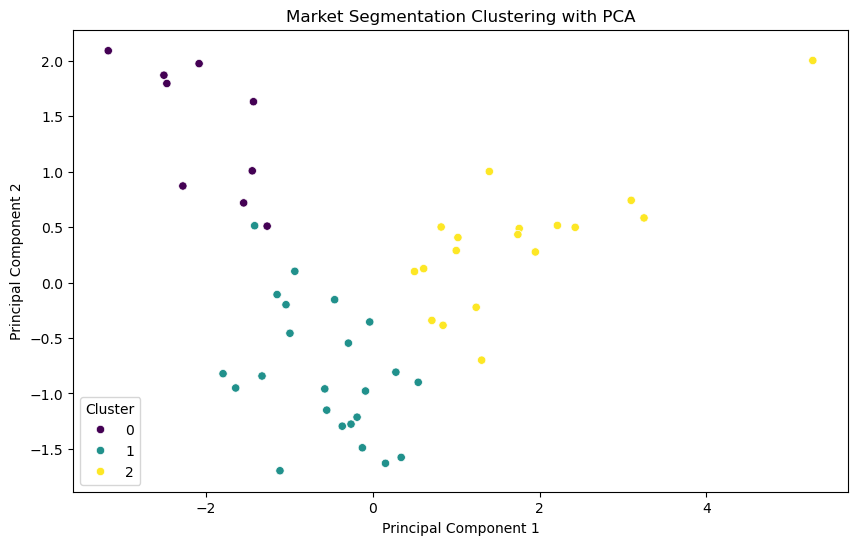

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df1["PCA1"], y=df1["PCA2"], hue=df1["Cluster"], palette="viridis")
plt.title("Market Segmentation Clustering with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [38]:
print(df.head())

           Brand Name  Battery Capacity(kWh)  Acceleration(sec)  \
0  Audi RS e-tron GT                    93.4                3.3   
1     Audi e-tron GT                    93.4                4.1   
2        Audi e-tron                    95.0                5.7   
3       Tata Nexon EV                   30.2                9.9   
4       Tata Tigor EV                   26.0                5.7   

   TopSpeed(km/h)  Range(km)  Max Power(kW)  Max Torque(Nm) Transmission  \
0             250        480            500             830    Automatic   
1             245        500            523             630    Automatic   
2             200        484            300             664    Automatic   
3             180        312             96             245    Automatic   
4             120        306             55             170    Automatic   

   No. of Seats  Charging T(h) No. of Airbags Drive Type  Price(Lh)  Cluster  
0             5              9            Yes        AWD     

In [39]:
print("Market Segmentation Completed!")

Market Segmentation Completed!


In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd

In [42]:
df2 = pd.read_csv("EV Maker by Place.csv")

In [43]:
label_encoders = {}
encoded_df2 = df2.copy()

In [44]:
for column in ["EV Maker", "Place", "State"]:
    le = LabelEncoder()
    encoded_df2[column] = le.fit_transform(df2[column])
    label_encoders[column] = le

In [45]:
num_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
encoded_df2["Cluster"] = kmeans.fit_predict(encoded_df2[["Place", "State"]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
df2["Market Segment"] = encoded_df2["Cluster"]

In [47]:
print(df2.head())

            EV Maker        Place        State  Market Segment
0        Tata Motors         Pune  Maharashtra               0
1  Mahindra Electric    Bengaluru    Karnataka               1
2       Ather Energy    Bengaluru    Karnataka               1
3      Hero Electric    New Delhi        Delhi               0
4       Ola Electric  Krishnagiri   Tamil Nadu               2


In [48]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EV Maker        62 non-null     object
 1   Place           62 non-null     object
 2   State           62 non-null     object
 3   Market Segment  62 non-null     int32 
dtypes: int32(1), object(3)
memory usage: 1.8+ KB
None


In [49]:
# Handle missing values (if any)
df2.dropna(inplace=True)

In [50]:
df2

,EV Maker,Place,State,Market Segment
0,Tata Motors,Pune,Maharashtra,0
1,Mahindra Electric,Bengaluru,Karnataka,1
2,Ather Energy,Bengaluru,Karnataka,1
3,Hero Electric,New Delhi,Delhi,0
4,Ola Electric,Krishnagiri,Tamil Nadu,2
...,...,...,...,...
57,YC Electric Vehicle,Delhi,Delhi,1
58,Dilli Electric Auto Pvt Ltd,New Delhi,Delhi,0
59,Electrotherm India,Ahmedabad,Gujarat,1
60,Lohia Auto Industries,Kashipur,Uttarakhand,2
